In [1]:
from pytube import YouTube

def download_video(video_url, file_name):
    yt = YouTube(video_url)
    stream = yt.streams.get_audio_only()
    stream.download(filename=file_name)
    return;

download_video('https://www.youtube.com/watch?v=U2Kyu4XURaE&list=RDiYYRH4apXDo&index=3','samples/useless')

/home/jupyter/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


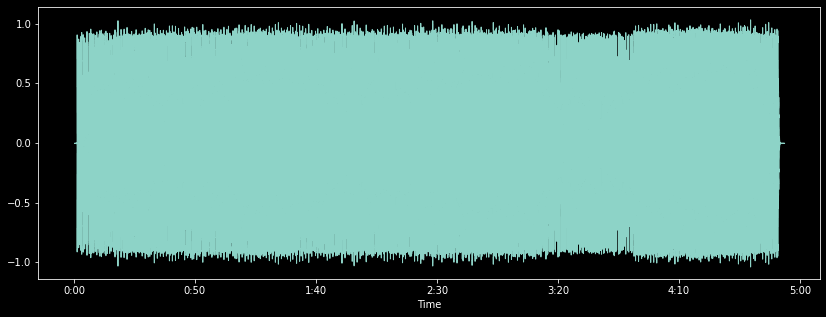

In [3]:
import librosa.display
import matplotlib.pyplot as plt

track = 'useless'
route = 'samples/'+ track

audio, sample_rate = librosa.load(route)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sample_rate)

In [10]:
# Getting the maximum value in audio and its minimum value
print('Maximum value in audio: ', max(audio))
print('Minimum value in audio: ', min(audio))

Maximum value in audio:  1.0280457
Minimum value in audio:  -1.0349903


In [11]:
sample_rate

22050

In [14]:
# With this function we get the duration of the audio which is the numebr of samples divided by the sample rate

def get_duration(audio, sample_rate):
    return len(audio)/sample_rate;

durs = get_duration(audio, sample_rate)
durs

293.5698866213152

In [17]:
# durs is the duration of the audio in seconds
# we print the duration of the audio in minutes
# and seconds by using the divmod function

def get_duration_in_min(durs):
    minutes, seconds = divmod(durs, 60)
    return minutes, seconds;

get_duration_in_min(durs)

(4.0, 53.56988662131522)

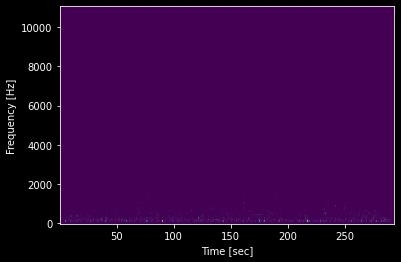

/tmp/ipykernel_21566/2145903725.py:23: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


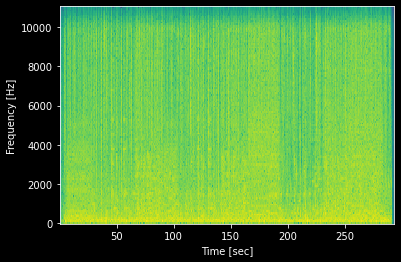

In [19]:
# Now we construct a scaleogram of the audio signal
# which contains information about the presence of
# different frequencies in the audio signal over time

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# We use the spectrogram function from scipy
# to get the spectrogram of the audio signal

frequencies, times, spectrogram = signal.spectrogram(audio, sample_rate)

# We plot the spectrogram

plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# We plot the spectrogram in a log scale

plt.pcolormesh(times, frequencies, np.log(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

